In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Building user-based recommendation model for Amazon.

### Analysis Task
- Exploratory Data Analysis:

1. Which movies have maximum views/ratings?
2. What is the average rating for each movie? 

In [3]:
# Imorting csv file jupiter Lab
data = pd.read_csv("Amazon - Movies and TV Ratings.csv")

In [4]:
# viewing 5 user Details
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# checking dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [6]:
#  defining a function to Remove falsy values from a list in Python 
def Remove_false(lst):
    return list(filter(None, lst))

In [7]:
# collecting movie list from dataframe to iterate in upcoming code
Movie_list = data.columns[1:]

# defining empty list to collect Average Rating and No of Rating
Avg_Rating = []
No_of_Rating = []

# Using for loop collecting Average Rating and No of Rating from data
for x in Movie_list:
    rating=Remove_false(data[x].apply(lambda x: x if x >= 1 else False))
    No_of_rating_per_Movie = len(rating)
    
#     if No_of_rating_per_Movie >=20:
    Avg_rating= ("{:.1f}".format(sum(rating)/No_of_rating_per_Movie))
    
    No_of_Rating.append(No_of_rating_per_Movie)
    Avg_Rating.append(Avg_rating)
    

In [8]:
# Creating a dictinary to mergre the Movie name Average Rating and No of Rating

data_m={'Movie_Name':Movie_list,'Avg_Rating':Avg_Rating,'No_of_Rating':No_of_Rating}
df=pd.DataFrame(data_m,index=None)
df1=df.copy()

# setting first name as index column
df.set_index("Movie_Name", inplace = True)
df.head()

,Avg_Rating,No_of_Rating
Movie_Name,,
Movie1,5.0,1
Movie2,5.0,1
Movie3,2.0,1
Movie4,5.0,2
Movie5,4.1,29


- Define the top 5 movies with the maximum ratings.

In [9]:
# sorting dataframe by maximum no of Rating

New_df=df1.sort_values(by='No_of_Rating',ascending=False,ignore_index=True)
New_df.head()

,Movie_Name,Avg_Rating,No_of_Rating
0,Movie127,4.1,2313
1,Movie140,4.8,578
2,Movie16,4.5,320
3,Movie103,4.6,272
4,Movie29,4.8,243


- Define the top 5 movies with the least audience.

In [10]:
# sorting dataframe by least no of Rating

New_ldf=df1.sort_values(by='No_of_Rating',ascending=True,ignore_index=True)
New_ldf.head()

,Movie_Name,Avg_Rating,No_of_Rating
0,Movie1,5.0,1
1,Movie71,4.0,1
2,Movie145,5.0,1
3,Movie69,1.0,1
4,Movie68,5.0,1


In [11]:
print('The Highest View Movie Name is :',New_df["Movie_Name"][0],
    '\nAvg Rating Of this Movie:',New_df["Avg_Rating"][0],
    '\nNo of Rating :',New_df["No_of_Rating"][0] )

The Highest View Movie Name is : Movie127 
Avg Rating Of this Movie: 4.1 
No of Rating : 2313


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


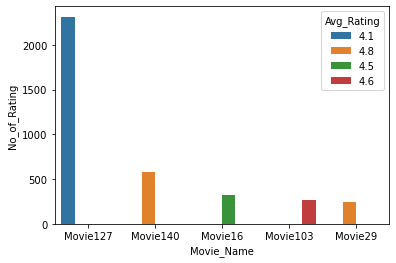

In [12]:
sns.barplot(New_df["Movie_Name"].head(),New_df["No_of_Rating"].head(),hue=New_df["Avg_Rating"].head());


### Recommendation Model: 
- Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

1. Divide the data into training and test data
2. Build a recommendation model on training data
3. Make predictions on the test data

In [13]:
#copying the data to prevent the modification in original file
data_mod=data.copy()

# checking the null value in the entire Dataframe
data_mod.isnull().sum().sum()

993688

In [14]:
# Replacing the null value with 0
data_mod=data_mod.fillna(0)
data_mod.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [15]:
# Defining the recommendetion function
def Get_recommended(Movie_name):
    Movie1_user_ratings = data_mod[Movie_name]
    similar_to_movie1=data_mod.corrwith(Movie1_user_ratings)
#     similar_to_movie1=Movie1_user_ratings.corrwith(data_mod)
    
    corr_movie1=pd.DataFrame(similar_to_movie1,columns=['Correlation'])
    corr_movie1=corr_movie1.join(df['No_of_Rating'])
    return corr_movie1[corr_movie1['No_of_Rating']>10].sort_values('Correlation',ascending=False).head()   

In [16]:
Get_recommended("Movie138")

,Correlation,No_of_Rating
Movie138,1.000000,13
Movie117,-0.002313,11
Movie90,-0.002351,18
Movie81,-0.002381,12
Movie109,-0.002492,13


In [17]:
# unpivoting the data
df_melt = data_mod.melt(id_vars = data.columns[0],value_vars=data.columns[1:],var_name="Movies",value_name="Rating")
df_melt.head()

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0


In [18]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_melt['Movies_no']= label_encoder.fit_transform(df_melt['Movies'])
df_melt['user_id']= label_encoder.fit_transform(df_melt['user_id'])

In [19]:
df_melt=df_melt.drop(['Movies'], axis = 1)
df_melt.head()

,user_id,Rating,Movies_no
0,3549,5.0,0
1,4200,0.0,0
2,3339,0.0,0
3,4689,0.0,0
4,458,0.0,0


In [20]:
df_melt.shape

(998688, 3)

In [21]:
# spliting the data into train and test data set
from sklearn.model_selection import train_test_split

In [22]:
train_data,test_data=train_test_split(df_melt,test_size=0.2)

In [23]:
test_data.shape

(199738, 3)

In [24]:
train_data.shape

(798950, 3)

In [25]:
from numpy import where

In [26]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2)

In [27]:
# fit the model
model.fit(train_data)

GaussianMixture(n_components=2)

In [28]:
# assign a cluster to each example
yhat = model.predict(train_data)

In [29]:
type(yhat)

numpy.ndarray

In [30]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [31]:
n_users = df_melt.user_id.unique().shape[0]
n_movies = df_melt.Movies_no.unique().shape[0]
n_movies = df_melt['Movies_no'].max()
A = np.zeros((n_users,n_movies))
# for line in df_melt.itertuples():
#     A[line[1]-1,line[2]-1] = line[3]
# print("Original rating matrix : ",A)

In [32]:
# Imorting csv file jupiter Lab
data_mod_std = pd.read_csv("Amazon - Movies and TV Ratings.csv",index_col=0)
data_mod_std = data_mod_std.fillna(0)
data_mod_std

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [33]:
def standardise(row):
    new_row = (row - row.mean())/(row.max() - row.min())
    return new_row

In [34]:
data_mod_std = data_mod_std.apply(standardise)
data_mod_std

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,0.999794,0.999794,-0.000206,-0.000413,-0.004909,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.001031,-0.000206,-0.000206,-0.000206,-0.059653,-0.000206,-0.000206,-0.000289,-0.000206,-0.000206,-0.000413,-0.000619,-0.000908,-0.000206,-0.000464,-0.000206,-0.000413,-0.048185,-0.000371,-0.000413,-0.000371,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000825,-0.000619,-0.000206,-0.000206,-0.001403,-0.000413,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000371,-0.002434,-0.000309,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000495,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000206,-0.000206,-0.000413,-0.000206,-0.002186,-0.000413,-0.000206,-0.000206,-0.000619,-0.004043,-0.000206,-0.000206,-0.015677,-0.001361,-0.024175,-0.019884,-0.000413,-0.000536,-0.000825,-0.000619,-0.00099,-0.000206,-0.00033,-0.000206,-0.001031,-0.00033,-0.051196,-0.000743,-0.000619,-0.000206,-0.006436,-0.010396,-0.002351,-0.001609,-0.007467,-0.000413,-0.000619,-0.001279,-0.000206,-0.000206,-0.002145,-0.001031,-0.001444,-0.000619,-0.000701,-0.000825,-0.000206,-0.000784,-0.00099,-0.000371,-0.392368,-0.000619,-0.000495,-0.000743,-0.000825,-0.000619,-0.000206,-0.00099,-0.000206,-0.000413,-0.000495,-0.002186,-0.000825,-0.115264,-0.001196,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000206,-0.000619,-0.000371,-0.000206,-0.000206,-0.000206,-0.00033,-0.000206,-0.000825,-0.013119,-0.000309,-0.001155,-0.004744,-0.003012,-0.002393,-0.000825,-0.000206,-0.000413,-0.000825,-0.000825,-0.000825,-0.000536,-0.000206,-0.000371,-0.002929,-0.000784,-0.000206,-0.000206,-0.000206,-0.000206,-0.001361,-0.000206,-0.000413,-0.005858,-0.000206,-0.003383,-0.004744,-0.001856,-0.000206,-0.001238,-0.001031,-0.001361,-0.001238,-0.001856,-0.00132,-0.001361,-0.000206,-0.001815,-0.000784,-0.000413,-0.000206,-0.001526,-0.000536,-0.001073,-0.000206,-0.

In [35]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
user_similirity=cosine_similarity(data_mod_std.T)
user_similirity=pd.DataFrame(user_similirity,index=data_mod_std.columns,columns=data_mod_std.columns)

In [52]:
user_similirity

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.000000,1.000000,-0.000206,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000462,-0.000206,-0.000206,-0.000206,-0.003757,-0.000206,-0.000206,-0.000268,-0.000206,-0.000206,-0.000292,-0.000357,-0.000445,-0.000206,-0.000323,-0.000206,-0.000335,-0.003268,-0.000290,-0.000292,-0.000290,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000357,-0.000206,-0.000206,-0.000545,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000290,-0.000782,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000343,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000206,-0.000292,-0.000206,-0.000694,-0.000292,-0.000206,-0.000206,-0.000357,-0.000929,-0.000206,-0.000206,-0.001859,-0.000685,-0.002310,-0.002077,-0.000292,-0.000355,-0.000445,-0.000357,-0.000460,-0.000206,-0.000283,-0.000206,-0.000462,-0.000283,-0.003410,-0.000410,-0.000357,-0.000206,-0.001215,-0.001505,-0.000726,-0.000583,-0.001272,-0.000292,-0.000390,-0.000531,-0.000206,-0.000206,-0.000674,-0.000462,-0.000566,-0.000357,-0.000405,-0.000413,-0.000206,-0.000411,-0.000460,-0.000290,-0.012380,-0.000357,-0.000337,-0.000405,-0.000413,-0.000357,-0.000206,-0.000486,-0.000206,-0.000292,-0.000337,-0.000708,-0.000413,-0.005238,-0.000527,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000357,-0.000290,-0.000206,-0.000206,-0.000206,-0.000283,-0.000206,-0.000413,-0.001673,-0.000277,-0.000503,-0.001023,-0.000796,-0.000732,-0.000413,-0.000206,-0.000292,-0.000413,-0.000413,-0.000413,-0.000349,-0.000206,-0.000290,-0.000792,-0.000411,-0.000206,-0.000206,-0.000206,-0.000206,-0.000540,-0.000206,-0.000292,-0.001123,-0.000206,-0.000847,-0.001008,-0.000619,-0.000206,-0.000506,-0.000462,-0.000540,-0.000506,-0.000646,-0.000539,-0.000544,-0.000206,-0.000618,-0.000430,-0.000292,-0.000206,-0.000581,-0.000349,-0.000478,-0.000206,-0.000559,-0.001202,-0.000744
Movie2,1.000000,1.000000,-0.000206,-0.000292,-0.001049,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000462,-0.000206,-0.000206,-0.000206,-0.003757,-0.000206,-0.000206,-0.

In [55]:
#  Recommendation model

def get_recommend(user_id):
    similar_score = user_similirity[user_id]
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score.head(5)

In [60]:
print(get_recommend('Movie20'))

Movie20     1.000000
Movie127    0.012862
Movie145   -0.000206
Movie154   -0.000206
Movie144   -0.000206
Name: Movie20, dtype: float64


In [53]:
items_similarity = data_mod_std.corr(method='kendall',min_periods=5)

In [54]:
items_similarity 

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,Movie41,Movie42,Movie43,Movie44,Movie45,Movie46,Movie47,Movie48,Movie49,Movie50,Movie51,Movie52,Movie53,Movie54,Movie55,Movie56,Movie57,Movie58,Movie59,Movie60,Movie61,Movie62,Movie63,Movie64,Movie65,Movie66,Movie67,Movie68,Movie69,Movie70,Movie71,Movie72,Movie73,Movie74,Movie75,Movie76,Movie77,Movie78,Movie79,Movie80,Movie81,Movie82,Movie83,Movie84,Movie85,Movie86,Movie87,Movie88,Movie89,Movie90,Movie91,Movie92,Movie93,Movie94,Movie95,Movie96,Movie97,Movie98,Movie99,Movie100,Movie101,Movie102,Movie103,Movie104,Movie105,Movie106,Movie107,Movie108,Movie109,Movie110,Movie111,Movie112,Movie113,Movie114,Movie115,Movie116,Movie117,Movie118,Movie119,Movie120,Movie121,Movie122,Movie123,Movie124,Movie125,Movie126,Movie127,Movie128,Movie129,Movie130,Movie131,Movie132,Movie133,Movie134,Movie135,Movie136,Movie137,Movie138,Movie139,Movie140,Movie141,Movie142,Movie143,Movie144,Movie145,Movie146,Movie147,Movie148,Movie149,Movie150,Movie151,Movie152,Movie153,Movie154,Movie155,Movie156,Movie157,Movie158,Movie159,Movie160,Movie161,Movie162,Movie163,Movie164,Movie165,Movie166,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
Movie1,1.000000,1.000000,-0.000206,-0.000292,-0.001113,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000462,-0.000206,-0.000206,-0.000206,-0.003785,-0.000206,-0.000206,-0.000292,-0.000206,-0.000206,-0.000292,-0.000357,-0.000461,-0.000206,-0.000357,-0.000206,-0.000357,-0.003290,-0.000292,-0.000292,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000357,-0.000206,-0.000206,-0.000546,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000851,-0.000357,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000413,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000206,-0.000292,-0.000206,-0.000715,-0.000292,-0.000206,-0.000206,-0.000357,-0.000947,-0.000206,-0.000206,-0.001893,-0.000876,-0.002360,-0.002092,-0.000292,-0.000357,-0.000506,-0.000357,-0.000461,-0.000206,-0.000292,-0.000206,-0.000462,-0.000292,-0.003483,-0.000413,-0.000357,-0.000206,-0.001292,-0.001523,-0.000745,-0.000584,-0.001293,-0.000292,-0.000413,-0.000546,-0.000206,-0.000206,-0.000685,-0.000462,-0.000584,-0.000357,-0.000413,-0.000413,-0.000206,-0.000413,-0.000461,-0.000292,-0.012289,-0.000357,-0.000357,-0.000413,-0.000413,-0.000357,-0.000206,-0.000506,-0.000206,-0.000292,-0.000357,-0.000745,-0.000413,-0.005253,-0.000546,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000357,-0.000292,-0.000206,-0.000206,-0.000206,-0.000292,-0.000206,-0.000413,-0.001686,-0.000292,-0.000506,-0.001034,-0.000800,-0.000745,-0.000413,-0.000206,-0.000292,-0.000413,-0.000413,-0.000413,-0.000357,-0.000206,-0.000292,-0.000800,-0.000413,-0.000206,-0.000206,-0.000206,-0.000206,-0.000546,-0.000206,-0.000292,-0.001133,-0.000206,-0.000852,-0.001013,-0.000619,-0.000206,-0.000506,-0.000462,-0.000546,-0.000506,-0.000653,-0.000546,-0.000546,-0.000206,-0.000619,-0.000461,-0.000292,-0.000206,-0.000584,-0.000357,-0.000506,-0.000206,-0.000584,-0.001224,-0.000745
Movie2,1.000000,1.000000,-0.000206,-0.000292,-0.001113,-0.000206,-0.000206,-0.000206,-0.000206,-0.000206,-0.000292,-0.000462,-0.000206,-0.000206,-0.000206,-0.003785,-0.000206,-0.000206,-0.

In [ ]:
from sklearn import KNNWithMeans
from sklearn import naive_bayes